In [5]:
import numpy as np
import pandas as pd
from astropy.io import votable
import matplotlib.pyplot as plt

In [2]:
csc21=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv")

/var/folders/6x/hz5y30457mqg1y9dl2fg7r5m00034d/T/ipykernel_34735/1910351754.py:1: DtypeWarning: Columns (57,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  csc21=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv")


In [27]:
erosita = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/upper_limits.vot').to_table().to_pandas()

In [16]:
seyferts = pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.csv")

In [29]:
full_data=pd.merge(seyferts, erosita, on=['PLATE','FIBERID','MJD'], how='left')

In [46]:
np.min(full_data['Exposure_02e'])

59.093502044677734

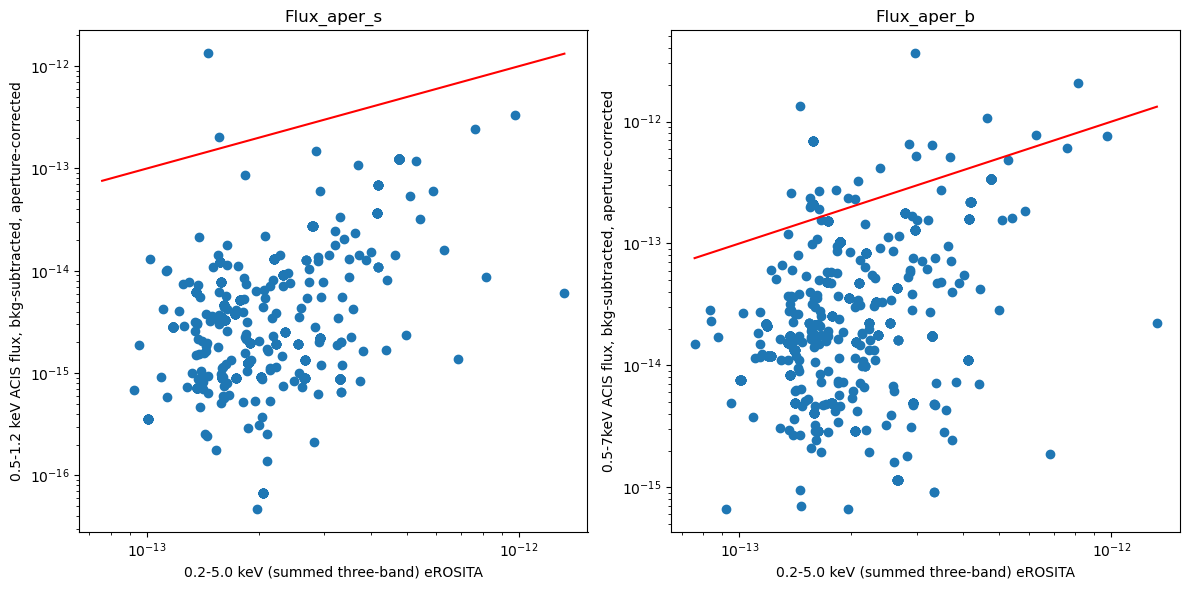

In [97]:
#plotting sum of eROSITA flux vs CSC flux; below the line is below the threshold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#flux_aper_s, underestimate
ax1.scatter(full_data['UL_B_02e'], full_data['flux_aper_s'])
#y=x line
ax1.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax1.set_ylabel('0.5-1.2 keV ACIS flux, bkg-subtracted, aperture-corrected')
ax1.set_title('Flux_aper_s')

#flux_aper_b, overestimate
ax2.scatter(full_data['UL_B_02e'], full_data['flux_aper_b'])
#y=x line
ax2.plot(np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])),
         np.linspace(np.min(full_data['UL_B_02e']), np.max(full_data['UL_B_02e'])), color='red')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('0.2-5.0 keV (summed three-band) eROSITA')
ax2.set_ylabel('0.5-7keV ACIS flux, bkg-subtracted, aperture-corrected')
ax2.set_title('Flux_aper_b')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [25]:
'''
Chandra fluxes, erg cm-2 s−1

flux_aper_b D 0.5-7keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_h D 2-7 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_m D 1.2-2 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_s D 0.5-1.2 keV ACIS flux, bkg-subtracted, aperture-corrected
flux_aper_w D 0.1-10 keV HRC flux, bkg-subtracted, aperture-corrected

_lolim_x and _hilim_x are the 68% confidence limits for band x
'''

###
# Erosita fluxes, in  erg s−1 cm−2
# Band of interest, with:
# 0.2-0.6 keV (soft): 021
# 0.6-2.3 keV (medium): 022
# 2.3-5.0 keV (hard): 023
# 0.2-5.0 keV (summed three-band): 02e
###

''

In [49]:
cone_search=pd.read_csv("/Users/kciurleo/Documents/kciurleo/AGN/csvs/topcat_erosita.csv")

(array([9., 0., 0., 0., 1., 3., 1., 0., 0., 4.]),
 array([6.03319424e-05, 1.05773595e-04, 1.51215248e-04, 1.96656901e-04,
        2.42098554e-04, 2.87540207e-04, 3.32981860e-04, 3.78423512e-04,
        4.23865165e-04, 4.69306818e-04, 5.14748471e-04]),
 <BarContainer object of 10 artists>)

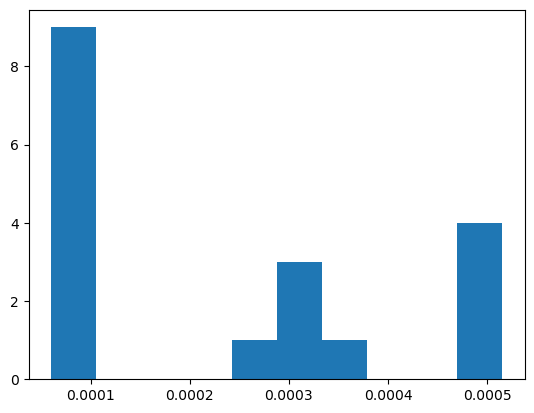

In [61]:
plt.hist(cone_search['Separation'])